In [62]:
import itertools as it
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
def T_pqr(p,q,r):
    G = nx.Graph()
    if p> 1 and q>1 and r >1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+q-1,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+q-1)
    if p == 1 or q ==1 or r == 1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p+q+r-3):
            G.add_edge(i,i+1)
    if p == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, 1):
            G.add_edge(i,i+1)
        for i in range (2,q):
            G.add_edge(i,i+1)
            G.add_edge(0,2)
        for i in range(q+1,q+r-1):
            G.add_edge(i,i+1)
            G.add_edge(0,q+1)
    if q ==2 :
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+2,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+2)
    if r == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        G.add_edge(0,p+q-1)
    return G

In [3]:
def symetryczna(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations_with_replacement(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    return zewn

In [4]:
def zewnetrzna(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    return zewn

In [5]:
#liczy zewenętrznąale numeruje poszczególne linijki outputu. Dla testów
# czy liczy odpowiednio
def zewnetrzna_num(A, k):
    
    max_len = max(len(sublist) for sublist in A)
    zewn = []
    
    for kombinacja in it.combinations(range(len(A)), k):
        summed_sublist = []
        for j in range(max_len):
            sublist_sum = sum(A[i][j] if j < len(A[i]) else 0 for i in kombinacja)
            summed_sublist.append(sublist_sum)
        zewn.append(summed_sublist)
    for idx, wynik in enumerate(zewn, 1):
        print(f"{idx} : {wynik}")

In [6]:
D3= T_pqr(2,2,1)
D5= T_pqr(3,2,2)

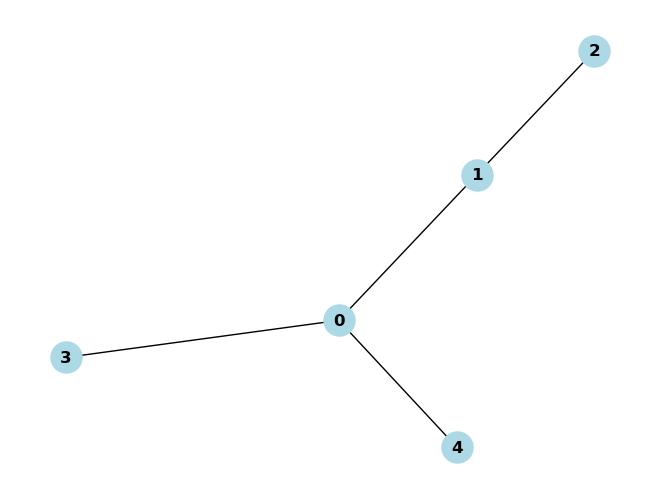

In [7]:
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

In [8]:
waga = tuple([[0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0],[1,-1,1,-1,0],[0,0,-1,1,0],
            [-1,0,1,0,1],[1,0,-1,-1,0],[0,0,0,-1,0],[-1,0,0,1,0],[1,-1,0,0,-1],
           [0,-1,0,0,1],[0,1,-1,0,-1],[0,0,1,0,-1], [-1,1,-1,0,1]])

In [9]:
def nadawanie_wag(graph, n, wagi):
    for i, node in enumerate(graph.nodes()):
        graph.nodes[node]['weight'] = wagi[i]

In [10]:
def nadawanie_wag2(graph, n, wagi_macierz):
    wagi_wszystkie = []
    graphs = [graph for _ in range(n)]
    if len(wagi_macierz)< n:
        raise ValueError("za mało wag")
    if len(wagi_macierz)> n:
        raise ValueError("za dużo wag")
    for i in range(n):
        if len(graph.nodes()) != len(wagi_macierz[i]):
            raise ValueError("za krótka lista wag dla grafu nr {}".format(i + 1))
    for G, row in zip(graphs, wagi_macierz):
        wagi = []
        for i, weight in enumerate(row):
            G.add_node(i, weight=weight)
            wagi.append(weight)
        wagi_wszystkie.append(wagi)
    return wagi_wszystkie

In [11]:
nadawanie_wag(D5, 16, waga)

In [12]:
#tak było zdefiniowane odbicie dla jednego grafu
def odbicie(G, node):
    wagi = [] 
    
    neighbors = list(G.neighbors(node))
    
    G.nodes[node]['weight'] = - G.nodes[node]['weight']
    
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['weight'] + G.nodes[node]['weight']
        G.nodes[neighbor]['weight'] = nowa_waga
        
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

### pojedyncze odbicie w ustalonym wierzchołku grafów

In [13]:
def ro_1(graph, n, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    results = []
    wagi_macierz = [list(wagi) for wagi in wagi_macierz]

    for i, G in enumerate(graphs):
        for node, weight in zip(G.nodes(), wagi_macierz[i]):
            G.nodes[node]['weight'] = weight
    
    for G in graphs:
        weights = []
        for node in G.nodes():
            G.nodes[node]['weight'] += 1
            weights.append(G.nodes[node]['weight'])
        results.append(weights)
    
    return results

In [14]:
ro_1(D5, 16, waga)

[[1, 1, 1, 1, 2],
 [2, 1, 1, 1, 0],
 [0, 2, 1, 2, 1],
 [1, 2, 1, 0, 1],
 [1, 0, 2, 2, 1],
 [2, 0, 2, 0, 1],
 [1, 1, 0, 2, 1],
 [0, 1, 2, 1, 2],
 [2, 1, 0, 0, 1],
 [1, 1, 1, 0, 1],
 [0, 1, 1, 2, 1],
 [2, 0, 1, 1, 0],
 [1, 0, 1, 1, 2],
 [1, 2, 0, 1, 0],
 [1, 1, 2, 1, 0],
 [0, 2, 0, 1, 2]]

In [15]:
##to z minusem
def ro_2(graph, n, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    results = []
    
    for i, G in enumerate(graphs):
        for node, weight in zip(G.nodes(), wagi_macierz[i]):
            G.nodes[node]['weight'] = weight
    
    for G in graphs:
        weights = []
        for node in G.nodes():
            G.nodes[node]['weight'] -= 1
            weights.append(G.nodes[node]['weight'])
        results.append(weights)
    
    return results

In [16]:
def odbicia(graph, n, node, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    odbicia_list = []
    
    for idx, (G, wagi) in enumerate(zip(graphs, wagi_macierz)):
        if len(wagi) != len(G.nodes()):
            raise ValueError(f"Za krótka lista wag dla grafu nr {idx+1}. Oczekiwano {len(G.nodes())}, otrzymano {len(wagi)}.")
        
        nadawanie_wag(G, n, wagi)
        
        if wagi[node] != 0:
            odbicie_result = odbicie(G, node)
            odbicia_list.append(odbicie_result)
    return odbicia_list

In [17]:
odbicia(D5, 16, 3, waga)

[[-2, 1, 0, -1, 0],
 [1, 1, 0, 1, 0],
 [-1, -1, 1, -1, 0],
 [2, -1, 1, 1, 0],
 [-1, 0, -1, -1, 0],
 [2, 0, -1, 1, 0],
 [1, 0, 0, 1, 0],
 [-2, 0, 0, -1, 0]]

In [18]:
#ta funkcja jest potrzebna tylko do wywołania w odbicia_ro
def odbicia_do_ro(graph, n, node, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    odbicia_list = []
    
    for idx, (G, wagi) in enumerate(zip(graphs, wagi_macierz)):
        if len(wagi) != len(G.nodes()):
            raise ValueError(f"Za krótka lista wag dla grafu nr {idx+1}. Oczekiwano {len(G.nodes())}, otrzymano {len(wagi)}.")
        
        nadawanie_wag(G, len(G.nodes()), wagi)
        odbicie_result = odbicie(G, node)
        odbicia_list.append(odbicie_result)
        
    return odbicia_list

In [19]:
odbicia_do_ro(D5, 16, 3, waga)

[[0, 0, 0, 0, 1],
 [1, 0, 0, 0, -1],
 [-2, 1, 0, -1, 0],
 [1, 1, 0, 1, 0],
 [-1, -1, 1, -1, 0],
 [2, -1, 1, 1, 0],
 [-1, 0, -1, -1, 0],
 [-1, 0, 1, 0, 1],
 [2, 0, -1, 1, 0],
 [1, 0, 0, 1, 0],
 [-2, 0, 0, -1, 0],
 [1, -1, 0, 0, -1],
 [0, -1, 0, 0, 1],
 [0, 1, -1, 0, -1],
 [0, 0, 1, 0, -1],
 [-1, 1, -1, 0, 1]]

In [20]:
#Ten program może jednak zwracać błędy. Jeśli tak się stanie, trzeba usunąć komendę if wagi[node] != 0:
#oraz co ważne również usunąć po jednym tabie w linijkach kodu:
#            odbicia_list = ro_1(graph, n, wagi_macierz)
#            odbicia_wynik = odbicia_do_ro(graph, n, node, odbicia_list)
#            wynik_koncowy = ro_2(graph, n, odbicia_wynik)



def odbicia_ro(graph, n, node, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    odbicia_list = []

    for idx, (G, wagi) in enumerate(zip(graphs, wagi_macierz)):
        if len(wagi) != len(G.nodes()):
            raise ValueError(f"Za krótka lista wag dla grafu nr {idx+1}. Oczekiwano {len(G.nodes())}, otrzymano {len(wagi)}.")
            
        nadawanie_wag(G, len(G.nodes()), wagi)
        
        if wagi[node] != 0:

            odbicia_list = ro_1(graph, n, wagi_macierz)

            odbicia_wynik = odbicia_do_ro(graph, n, node, odbicia_list)

            wynik_koncowy = ro_2(graph, n, odbicia_wynik)

    return wynik_koncowy

In [21]:
odbicia_ro(D5, 16, 3, waga)

[[-1, 0, 0, -2, 1],
 [0, 0, 0, -2, -1],
 [-3, 1, 0, -3, 0],
 [0, 1, 0, -1, 0],
 [-2, -1, 1, -3, 0],
 [1, -1, 1, -1, 0],
 [-2, 0, -1, -3, 0],
 [-2, 0, 1, -2, 1],
 [1, 0, -1, -1, 0],
 [0, 0, 0, -1, 0],
 [-3, 0, 0, -3, 0],
 [0, -1, 0, -2, -1],
 [-1, -1, 0, -2, 1],
 [-1, 1, -1, -2, -1],
 [-1, 0, 1, -2, -1],
 [-2, 1, -1, -2, 1]]

### wielokrotne odbijanie na wielu grafach z ro z usuwaniem trywialnych odbić oraz usuwaniem ujemnych list
### bez zliczania odbić

# Ten pierwszy odbicia_w_1 ma printowanie poszczególnych etapów, potrzebne mi to było w debugu i może się przydać. Jeśli zależy Ci na czasie, runuj od razu drugie w kolejności odbicia_w_1

In [22]:
def nadawanie_wag(graph, n, wagi):
    graphs = [graph.copy() for _ in range(n)]

    for i, node in enumerate(graph.nodes()):
        graph.nodes[node]['weight'] = wagi[i]


In [23]:
def odbicia_w_1_printujacy(graph, n, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    waga_dodatnia = []
    waga_po_final = []
    sprawdzone_wagi = []
    wagi_macierz = [list(wagi) for wagi in wagi_macierz]

    def contains_negative(waga_list):
        return any(any(weight < 0 for weight in podlista) for podlista in waga_list)

    def contains_positive(waga_list):
        return any(all(weight >= 0 for weight in podlista) for podlista in waga_list)

    def contains_positive_1(waga_list):
        return next((podlista for podlista in waga_list if all(weight >= 0 for weight in podlista)), None)

    def is_the_same(wagi1, wagi2):
        return all(all(a == b for a, b in zip(sublist1, sublist2)) for sublist1, sublist2 in zip(wagi1, wagi2))

    for G, wagi in zip(graphs, wagi_macierz):
        nadawanie_wag(G, n, wagi_macierz)

    wynikx = wagi_macierz

    while contains_negative(wynikx):
        print(f"Start iteracji - wynikx: {wynikx}")
        wagi_zaktualizowane = False

        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"], reverse=True)
        node = sorted_nodes[0][0]

        for i in range(n):
            if wynikx[node] != 0:
                wynik = ro_1(graph, n, wynikx)
                print(f"Po ro_1: {wynik}")
                wynik2 = odbicia_do_ro(graph, n, node, wynik)
                print(f"Po odbicia_do_ro: {wynik2}")
                wynik3 = ro_2(graph, n, wynik2)
                print(f"Po ro_2: {wynik3}")

                if not is_the_same(wynikx, wynik3):
                    waga_po_final.append(wynik3)
                    print(f"Dodano do waga_po_final: {waga_po_final}")
                    wagi_zaktualizowane = True
                else:
                    print("wynik3 jest taki sam jak wynikx, nie aktualizujemy.")

                if contains_positive_1(wynik3) and not any(is_the_same(wagi, wynik3) for wagi in sprawdzone_wagi):
                    sprawdzone_wagi.append([row.copy() for row in wynik3])
                    print(f"Dodano do sprawdzone_wagi: {sprawdzone_wagi}")

                wynikx = wynik3
                print(f"Nowe wynikx: {wynikx}")

        if not wagi_zaktualizowane:
            print("Koniec, brak zmian w tej iteracji.")
            break

        if contains_positive(wynikx):
            print(f"Znaleziono wagi dodatnie: {wynikx}")
            wagi = contains_positive_1(wynikx)
            break

    print("Ostateczne wagi:", wagi)


In [24]:
odbicia_w_1_printujacy(D5, 6, ([0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0],[1,-1,1,-1,0]))

Start iteracji - wynikx: [[0, 0, 0, 0, 1], [1, 0, 0, 0, -1], [-1, 1, 0, 1, 0], [0, 1, 0, -1, 0], [0, -1, 1, 1, 0], [1, -1, 1, -1, 0]]
Po ro_1: [[1, 1, 1, 1, 2], [2, 1, 1, 1, 0], [0, 2, 1, 2, 1], [1, 2, 1, 0, 1], [1, 0, 2, 2, 1], [2, 0, 2, 0, 1]]
Po odbicia_do_ro: [[0, -1, 0, 1, 2], [1, -1, 0, 1, 0], [-2, -2, -1, 2, 1], [-1, -2, -1, 0, 1], [1, 0, 2, 2, 1], [2, 0, 2, 0, 1]]
Po ro_2: [[-1, -2, -1, 0, 1], [0, -2, -1, 0, -1], [-3, -3, -2, 1, 0], [-2, -3, -2, -1, 0], [0, -1, 1, 1, 0], [1, -1, 1, -1, 0]]
Dodano do waga_po_final: [[[-1, -2, -1, 0, 1], [0, -2, -1, 0, -1], [-3, -3, -2, 1, 0], [-2, -3, -2, -1, 0], [0, -1, 1, 1, 0], [1, -1, 1, -1, 0]]]
Nowe wynikx: [[-1, -2, -1, 0, 1], [0, -2, -1, 0, -1], [-3, -3, -2, 1, 0], [-2, -3, -2, -1, 0], [0, -1, 1, 1, 0], [1, -1, 1, -1, 0]]
Po ro_1: [[0, -1, 0, 1, 2], [1, -1, 0, 1, 0], [-2, -2, -1, 2, 1], [-1, -2, -1, 0, 1], [1, 0, 2, 2, 1], [2, 0, 2, 0, 1]]
Po odbicia_do_ro: [[1, 1, 1, 1, 2], [2, 1, 1, 1, 0], [0, 2, 1, 2, 1], [1, 2, 1, 0, 1], [1, 0, 2, 2,

In [25]:
### ten program ma taką samą logikę, ale wyrzuca tylko output
def odbicia_w_1(graph, n, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    waga_dodatnia = []
    waga_po_final = []
    sprawdzone_wagi = []
    wagi_macierz = [list(wagi) for wagi in wagi_macierz]

    def contains_negative(waga_list):
        return any(any(weight < 0 for weight in podlista) for podlista in waga_list)

    def contains_positive(waga_list):
        return any(all(weight >= 0 for weight in podlista) for podlista in waga_list)

    def contains_positive_1(waga_list):
        for podlista in waga_list:
            if all(weight >= 0 for weight in podlista):
                return podlista
                
    def is_the_same(wagi1, wagi2):
        if all(all(a == b for a, b in zip(sublist1, sublist2)) for sublist1, sublist2 in zip(wagi1, wagi2)):
            return True
        
    for G, wagi in zip(graphs, wagi_macierz):
        nadawanie_wag(G, n, wagi_macierz)

    while contains_negative(wagi_macierz):
        wagi_zaktualizowane = False 

        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"], reverse=True)
        node = sorted_nodes[0][0]

        for i in range(n):
            if wagi[node] != 0:
                wynik = ro_1(graph, n, wagi_macierz)
                wynik2 = odbicia_do_ro(graph, n, node, wynik)
                wynik3 = ro_2(graph, n, wynik2)

                if not is_the_same(wagi_macierz, wynik3):
                    waga_po_final.append(wynik3)
                    wagi_zaktualizowane = True 
                    
                if contains_positive_1(wynik3) and (is_the_same(wagi, wynik3) for wagi in sprawdzone_wagi) is False:
                    sprawdzone_wagi.append([row.copy() for row in wynik3])

                wagi_macierz = wynik3

        if not wagi_zaktualizowane:
            break

        if contains_positive(wagi_macierz):
            
            wagi = contains_positive_1(wagi_macierz)

            break
    print( wagi)

In [26]:
odbicia_w_1(D5, 14, ([0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0],[1,-1,1,-1,0],[0,0,-1,1,0],
            [-1,0,1,0,1],[1,0,-1,-1,0],[0,0,0,-1,0],[-1,0,0,1,0],[1,-1,0,0,-1],
           [0,-1,0,0,1],[0,1,-1,0,-1]))

[0, 0, 0, 0, 1]


In [27]:
odbicia_w_1(D5, 16, waga)

[0, 0, 0, 0, 1]


In [28]:
odbicia_w_1(D5, 5, ([0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0]))

[0, 0, 0, 0, 1]


In [29]:
odbicia_w_1(D5, 2, ([0,0,0,0,1],[1,0,0,0,-1]))

IndexError: list index out of range

### wielokrotne odbijanie na wielu grafach z ro z usuwaniem trywialnych odbić oraz usuwaniem ujemnych list

# ze zliczaniem odbić

In [30]:
def odbicia_w_1_num(graph, n, wagi_macierz):
    graphs = [graph.copy() for _ in range(n)]
    waga_dodatnia = []
    waga_po_final = []
    sprawdzone_wagi = []
    wagi_macierz = [list(wagi) for wagi in wagi_macierz]
    odbicia_counter = 0

    def contains_negative(waga_list):
        return any(any(weight < 0 for weight in podlista) for podlista in waga_list)

    def contains_positive(waga_list):
        return any(all(weight >= 0 for weight in podlista) for podlista in waga_list)

    def contains_positive_1(waga_list):
        for podlista in waga_list:
            if all(weight >= 0 for weight in podlista):
                return podlista
                
    def is_the_same(wagi1, wagi2):
        if all(all(a == b for a, b in zip(sublist1, sublist2)) for sublist1, sublist2 in zip(wagi1, wagi2)):
            return True
        
    for G, wagi in zip(graphs, wagi_macierz):
        nadawanie_wag(G, n, wagi_macierz)

    while contains_negative(wagi_macierz):
        wagi_zaktualizowane = False 

        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"], reverse=True)
        node = sorted_nodes[0][0]

        for i in range(n):
            if wagi[node] != 0:
                wynik = ro_1(graph, n, wagi_macierz)
                wynik2 = odbicia_do_ro(graph, n, node, wynik)
                odbicia_counter += 1
                wynik3 = ro_2(graph, n, wynik2)

                if not is_the_same(wagi_macierz, wynik3):
                    waga_po_final.append(wynik3)
                    wagi_zaktualizowane = True 
                if contains_positive_1(wynik3) and (is_the_same(wagi, wynik3) for wagi in sprawdzone_wagi) is False:
                    sprawdzone_wagi.append([row.copy() for row in wynik3])
                    
                wagi_macierz = wynik3

        if not wagi_zaktualizowane:
            break

        if contains_positive(wagi_macierz):            
            wagi = contains_positive_1(wagi_macierz)

            break
    print(f"Liczba wywołań funkcji odbicia {odbicia_counter}")
    print(wagi)

In [31]:
odbicia_w_1_num(D5, 16, ([0,0,0,0,1],[1,0,0,0,-1],[-1,1,0,1,0],[0,1,0,-1,0],
            [0,-1,1,1,0],[1,-1,1,-1,0],[0,0,-1,1,0],
            [-1,0,1,0,1],[1,0,-1,-1,0],[0,0,0,-1,0],[-1,0,0,1,0],[1,-1,0,0,-1],
           [0,-1,0,0,1],[0,1,-1,0,-1],[0,0,1,0,-1], [-1,1,-1,0,1]))

Liczba wywołań funkcji odbicia 16
[0, 0, 0, 0, 1]
